In [1]:
#GAUSSIAN PDF AND CDF
from scipy.stats import norm
norm.pdf(0)

0.3989422804014327

In [27]:
norm.pdf(0, loc=5, scale=10)
#could be using a gaussian with mean other than 0 and variance other than one, 
#so u could pass that in as args to above fn if needed. loc is mean, scale is
#the stddev. so need sqrt of variance, variance here is 100. has much smaller 
#prob density as expected.

0.035206532676429952

In [3]:
#might need calc prob dens of many diff values in an array simultaneously.
#do not use for loop to calc pdf of each. like numpy fns, scipy also lets
#us do element wise calcs. calc pdf of all at once with the fn.
import numpy as np
r = np.random.randn(10) #1d np array of randn
norm.pdf(r)

array([ 0.19723065,  0.0646351 ,  0.24328921,  0.36525671,  0.30404856,
        0.23945168,  0.28773373,  0.34085283,  0.33713295,  0.37113555])

In [4]:
#common calculation needed is not exactly pdf but log of the pdf, because:
#when u want to calc joint prob of some samples, need to multiply them.
#but if you calc joint log prob can add indiv probs together instead.
#adding is cheaper than multip so saves time. since gaussian is exponential
#form, taking log gets rid of the exponent, so again saves time.
#summary- log prob advantageous to actual pdf. see math in video, explains.
norm.logpdf(r)

array([-1.62338145, -2.73899768, -1.41350437, -1.00715487, -1.19056786,
       -1.42940363, -1.24571977, -1.07630447, -1.08727792, -0.99118792])

In [5]:
#cdf is cumulative dist fn, pdf is prob dist fn. cdf is integral of the 
#pdf from neg infinity to X. integral not solveable by math expression.
#but can compute it numerically. 
norm.cdf(r)

array([ 0.11762072,  0.02820146,  0.15997735,  0.66277148,  0.76945732,
        0.15614923,  0.20942094,  0.71260454,  0.2808763 ,  0.64807552])

In [6]:
norm.logcdf(r) #this is also available.

array([-2.14029007, -3.56838142, -1.83272305, -0.41132503, -0.26206979,
       -1.8569431 , -1.563409  , -0.33882866, -1.26984091, -0.43374804])

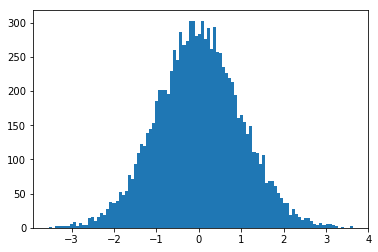

In [7]:
#SAMPLING FROM GAUSSIAN DISTRIBUTION
r = np.random.randn(10000)
import matplotlib.pyplot as plt
plt.hist(r, bins=100) #can use 100 bins as there are many samples (10k).
plt.show() #proof that its a normal dist, 100 bins to show more smoothly.

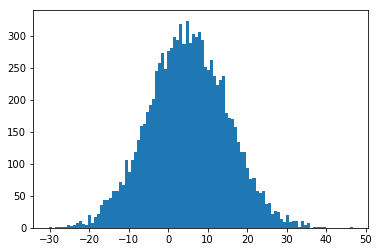

In [8]:
#to get a gaussian with arbitrary mean and stddev, can use same function.
r = 10*np.random.randn(10000) + 5 #many samples, one feature, only 1 rand var.
plt.hist(r, bins=100)
plt.show() #notice that scale 10 multiplies the stddev, and 5 adds to the mean.
#variance was mult by sqrt of scale since stddev is sqrt of variance.

[[ 0.89124845  0.10703349]
 [ 1.06306605 -0.80362   ]
 [-0.73853719 -0.82414504]
 ..., 
 [-0.01546677  0.56847003]
 [ 1.05756192  0.95455992]
 [-0.7903416  -0.09512794]]


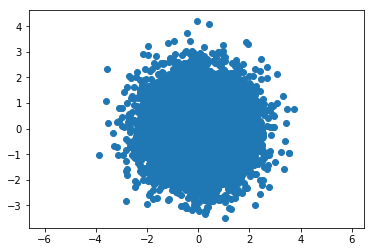

In [9]:
#SAMPLING FROM GAUSSIAN MULTIDIMENSIONAL
#we gonna see spherical and axis-aligned elliptical
r = np.random.randn(10000, 2) #same fn, add more dims, 2 rand vars, 2 features.
print(r)
#spherical, sample from 2d gaussian wit mean 0 var 1. called spherical gaussian
#bcos each dimension is uncorr & indep of each other, & all have same variance.
plt.scatter(r[:,0], r[:,1]) #verify points spread out in circular cloud.
#all-rows-col-0(1st col) and all-rows-col-1(2nd col) make up the two rand vars.
plt.axis('equal') 
plt.show()

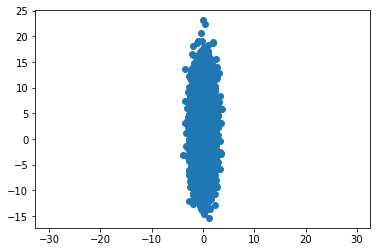

In [10]:
#elliptical gaussian, so variance must be diff for each dimension.
r[:,1] = 5*r[:,1] + 2 #mult variance of 2nd random var by 5, and add 2 to mean.
#the 1st rand var in all-rows-col-0 is kept same, 2nd var is all-rows-col-1.
plt.scatter(r[:,0], r[:,1])
plt.axis('equal') 
#above to counteract matplotlib scaling axes so data balanced each direction. 
plt.show()
#can make ellipse unaligned to axes, means have full cov matrix with non-zero 
#vals in the off-diagonals, meaning dims then correlated with each other.

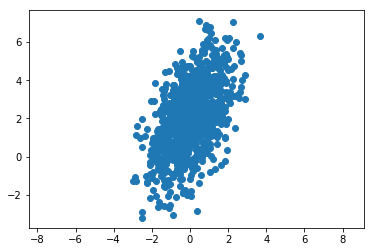

In [11]:
#SAMPLE GENERAL MULTIVAR NORMAL DIST
#dims not indep of each other, so full covariance matrix non-zero off-diags.
#a scatter of these random vars would show ellipse unaligned from axes.
cov = np.array([[1, 0.8], [0.8, 3]]) #var 1 in 1st dim and var 3 in 2nd dim
#cov between two dims is 0.8 (non-zero off-diags). if those were zero this 
#would mean the rand vars cov matrix came from, would show unaligned ellipse.
from scipy.stats import multivariate_normal as mvn
mu = np.array([0,2]) #mean, the greek letter mu. 
#scipy doc shows a fn 'rvs' that samples mvn. old version of doc would show
#only two params, mean and cov. but want more than one sample at a time. Newer
#docs show size param for 'rvs', so specify number of samples you want. #oldest
#version still at top of google results so be careful when searching.
r = mvn.rvs(mean = mu, cov = cov, size=1000) #1000 data points.
#scipy gives more precise way to make than np's random.randn, here 2 rand vars.
plt.scatter(r[:,0], r[:,1]) #see, 2 dim cov & 2 means guaranteed two rand vars.
plt.axis('equal')
plt.show() #unaligned ellipse as expected, corr between dims

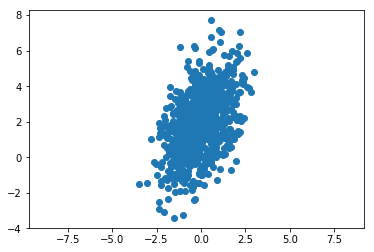

In [12]:
r = np.random.multivariate_normal(mean=mu, cov=cov, size=1000)
plt.scatter(r[:,0], r[:,1]) 
#though random.randn less precise than scipy's mvn.rvs
#(as in cant easily do cov tho you can do mean by adding and stddev by mult), 
#above from numpy is just as good, same params even.
plt.axis('equal')
#https://matplotlib.org/examples/pylab_examples/axis_equal_demo.html
plt.show()

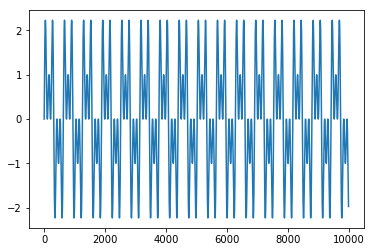

In [26]:
#OTHER INTERESTING SCIPY FUNCTIONS
import scipy.io, scipy.io.wavfile, scipy.signal 
#cant just import scipy, submodules must be separately imported.

#show some fns that exist. not heavy code angle bcos without theory background
#the scipy code isn't meaningful. Also don't use these very often.

scipy.io.loadmat #also .savemat
#matlab a popular numerical computing lang in academia, this loads that format.

scipy.io.wavfile.read #also .write
#audio like img are common source of physical data. wav files contain signal 
#amplitude at every point in time sound sampled. typical sampling rate 44.1KHz
#means 441000 samples(integers) every second of sound.

scipy.signal
#closely related to machine learning is signal processing. one popular signal 
#processing function is convolution. Cnn's use it, scipy has multiple of it.
#scipy.signal.convolve for arbitrary signals of any size. images (in 2d if b&w)
#, use scipy.signal.convolve2d . 


#Signal also has filtering fns. Filters are waveforms that alter input sigal.
#examples are audio effects like reverb and echo. fast fourier transform, a 
#common signal processing fn, is not in scipy oddly, but in numpy. Fft converts
#signal from time domain to frequency domain, showing frequency components of 
#original signal. 
x = np.linspace(0,100,10000) #from 0, to 100, 10k points
y = np.sin(x) + np.sin(3*x) + np.sin(5*x) #sine wave with multiple frequencies
plt.plot(y)
plt.show()#as u can see, a periodic wave with multiple frequency components

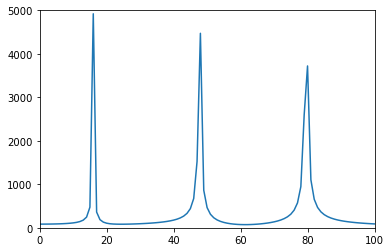

In [29]:
Y = np.fft.fft(y) #fast fourier transform gives signal with complex numbers
plt.axis([0,100,0,5000])
plt.plot(np.abs(Y))#need to find magnitude before plotting
plt.show() #see three spikes, tallest around 16, then around 48, 3rd around 80.

In [31]:
print(2*np.pi*16/100) #calc the original frequencies, 2PI*freq/100
print(2*np.pi*48/100) #div by 100 because that was the x limit, end of domain.
print(2*np.pi*80/100) #the freq number is where spike is on graph.
#obviously the freq values will all be within 100 as domain is 0 to 100.

1.0053096491487339
3.015928947446201
5.026548245743669
